In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import scipy.stats as ss

In [27]:
def total_model(param1,param2,param3,param4):
    #insert some functions of param1,param2,param3,param4...
    some_value=2*param1+param2+3*param3+param4
    return(some_value)
def lprior(p):
    param1,param2,param3,param4 = p[0],p[1],p[2],p[3]
    prior = 0.0
    prior += ss.norm.logpdf(param1,loc=5.,scale=3)
    prior += ss.norm.logpdf(param2,loc=3.,scale=1.)+ss.uniform.logpdf(param2,loc=0.,scale=10)
    prior += ss.norm.logpdf(param3,loc=2.,scale=1.)
    prior += ss.norm.logpdf(param4,loc=3.,scale=2.)+ss.uniform.logpdf(param4,loc=0.,scale=10)
    if np.isnan(prior):
        return(-np.inf)
    return(prior)
def log_probability(p):
    param1,param2,param3,param4 = p[0],p[1],p[2],p[3]
    model= total_model(param1,param2,param3,param4)
    lp = lprior(p) + np.nansum(np.log(model))
    if np.isnan(lp):
        return(-np.inf)
    return lp
def confidenceInterval(y):
    median=np.median(y)
    pct15=np.percentile(y,15)
    pct85=np.percentile(y,85)
    list1=np.array([median,pct15,pct85])
    return list1

In [28]:
nSamp=200
nBurn=100
ndim=4
nwalkers=10*ndim

guess=[5,3,2,3]
p0 = np.zeros((nwalkers,ndim))
for idx,thisguess in enumerate(guess):
    p0[:,idx] = (np.random.randn(nwalkers)*0.001+1.0)*thisguess


In [29]:
#sample
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)
pos,prob,state=sampler.run_mcmc(p0, nBurn)
sampler.reset()
pos,prob,state=sampler.run_mcmc(pos, nSamp)

/var/folders/f4/vlzp24jx6r9962ljc6g1mcn00000gn/T/ipykernel_89771/579553167.py:18: RuntimeWarning: invalid value encountered in log
  lp = lprior(p) + np.nansum(np.log(model))


In [30]:
#print out distribution
samples = total_model(sampler.flatchain[:,0],sampler.flatchain[:,1],sampler.flatchain[:,2],sampler.flatchain[:,3])
valu=confidenceInterval(samples)

Best estimation of thing :  25.838741276701388
Upper error :  6.616662953869447
Lower error :  6.894353849918538


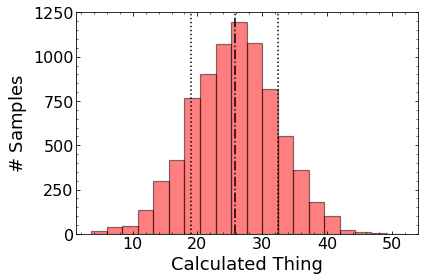

In [31]:
#plot histogram
fig=plt.figure()
ax1=plt.subplot(111)
ax1.hist(samples, bins = 20, edgecolor='black', linewidth=1.2, color='red',alpha=0.5)
ax1.axvline(x=valu[2], color='k', linestyle=':')
ax1.axvline(x=valu[0], color='k', linestyle='-.')
ax1.axvline(x=valu[1], color='k', linestyle=':')
ax1.set_xlabel('Calculated Thing', fontsize = 18)
ax1.set_ylabel('$\#$ Samples', fontsize =18)
plt.tick_params(axis ='both',which='both',direction = 'in', top=True, right=True, labelsize = 16, pad=2)
plt.minorticks_on()
plt.tight_layout()

#print out results
print("Best estimation of thing : ", valu[0]) 
print("Upper error : ", (valu[2] - valu[0]))
print("Lower error : ", (valu[0] - valu[1])) 
